<a href="https://colab.research.google.com/github/SSHI22/Github-Colab--/blob/main/Dict/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EA%B8%B0%EB%A7%90%EA%B3%BC%EC%A0%9C_%EA%B8%B0%EC%98%A8_%EC%98%88%EC%B8%A1_226888_%EC%82%AC%EC%8B%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.데이터 획득** 

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [67]:
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

In [68]:
filepath = '/content/temps.csv'
features = pd.read_csv(filepath)

**2.데이터 시각화**

In [69]:
import datetime 

years = features['year'] 
months = features['month']
days = features['day']

In [70]:
dates = []  
for year,month,day in zip(years,months,days):
    date = str(year)+'-'+str(month)+'-'+str(day)  
    dates.append(date)

In [71]:
times = []
for date in dates:
    time = datetime.datetime.strptime(date,'%Y-%m-%d')
    times.append(time)
times[:5] 

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

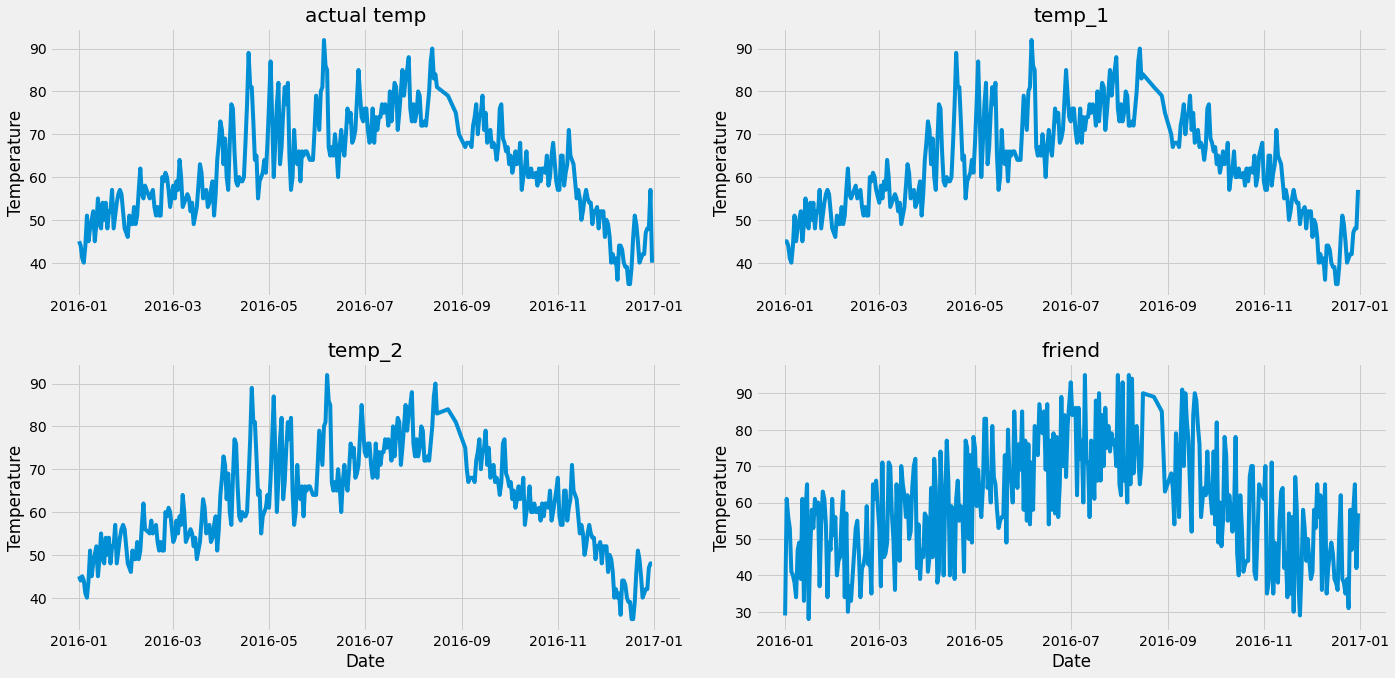

In [73]:
plt.style.use('fivethirtyeight')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,10))
 
# ==1== actual특징열
ax1.plot(times,features['actual'])
ax1.set_xlabel('');ax1.set_ylabel('Temperature');ax1.set_title('actual temp')
# ==2== 전날의 온도
ax2.plot(times,features['temp_1'])
ax2.set_xlabel('');ax2.set_ylabel('Temperature');ax2.set_title('temp_1')
# ==3== 지난 이틀 동안의 온도
ax3.plot(times,features['temp_2'])
ax3.set_xlabel('Date');ax3.set_ylabel('Temperature');ax3.set_title('temp_2')
# ==4== friend
ax4.plot(times,features['friend'])
ax4.set_xlabel('Date');ax4.set_ylabel('Temperature');ax4.set_title('friend')
plt.tight_layout(pad=2)

**3.특징처리** 

In [52]:
features = pd.get_dummies(features)

In [53]:
targets = np.array(features['actual'])
features = features.drop('actual',axis=1)
features = np.array(features)

In [54]:
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)

# 4.네트워크 모델을 구축하다.

In [55]:
model = tf.keras.Sequential()
model.add(layers.Dense(16,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.Dense(32,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.Dense(1,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.01)))

In [56]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001),loss='mean_squared_error')

In [61]:
model.fit(input_features,targets,validation_split=0.25,epochs=100,batch_size=128)

Epoch 1/100
3/3 [==============================] - 0s 32ms/step - loss: 24.7012 - val_loss: 21.0184
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 27.6095 - val_loss: 18.8249
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 23.8831 - val_loss: 17.4849
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 24.3663 - val_loss: 28.3685
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 25.5652 - val_loss: 29.5196
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 53.8254 - val_loss: 24.8665
Epoch 7/100
3/3 [==============================] - 0s 25ms/step - loss: 29.3232 - val_loss: 47.3352
Epoch 8/100
3/3 [==============================] - 0s 15ms/step - loss: 50.6275 - val_loss: 24.0555
Epoch 9/100
3/3 [==============================] - 0s 15ms/step - loss: 27.1818 - val_loss: 33.8758
Epoch 10/100
3/3 [==============================] - 0s 20ms/step - loss: 46.4166 - val_loss: 20.2692

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                240       
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________


In [63]:
predict = model.predict(input_features)

11/11 [==============================] - 0s 2ms/step


5. 결과 나타남

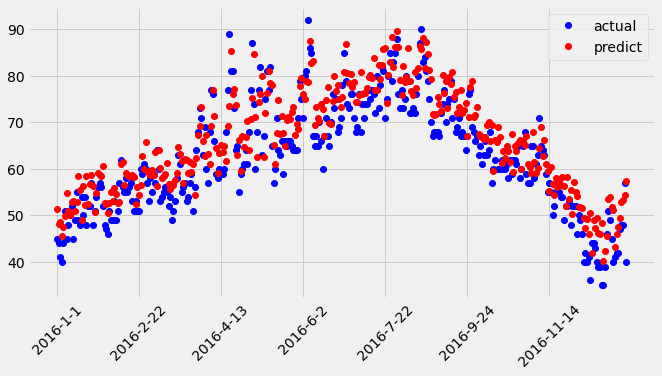

In [65]:
fig = plt.figure(figsize=(10,5))
axes = fig.add_subplot(111)
axes.plot(dates,targets,'bo',label='actual')
axes.plot(dates,predict,'ro',label='predict')
axes.set_xticks(dates[::50])
axes.set_xticklabels(dates[::50],rotation=45)
 
plt.legend()
plt.show()